In [7]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#df = pd.read_csv('../rarefy.k=rarefy.k=21.s1000.10m.csv')
df = pd.read_csv('../xxx.csv')
#df = df[df['metag'] == 'ERR3211919']

In [3]:
df

,iteration,position,cumulative,metag
0,0,0,0.001288,ERR1135207
1,0,100,0.097293,ERR1135207
2,0,200,0.154323,ERR1135207
3,0,300,0.169882,ERR1135207
4,0,400,0.177057,ERR1135207
...,...,...,...,...
5745,49,11000,0.544678,ERR1135207
5746,49,11100,0.546807,ERR1135207
5747,49,11200,0.547043,ERR1135207
5748,49,11300,0.548279,ERR1135207


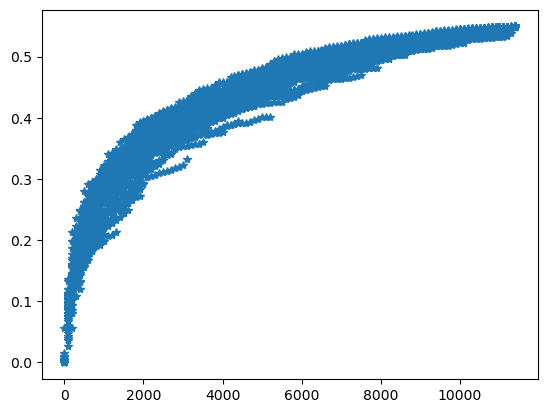

In [4]:
plt.plot(df.position, df.cumulative, '*')

In [5]:
df = df.sort_values(by=["iteration", "position"])

# Group by iteration and calculate cumulative kmers per sample position
#df["cumulative"] = df.groupby("iteration")["cumulative"]

# Calculate mean and std across iterations at each sample position
summary = df.groupby("position")["cumulative"].agg(["mean", "std"]).reset_index()
summary

,position,mean,std
0,0,0.002249,0.008408
1,100,0.088718,0.025109
2,200,0.131540,0.030038
3,300,0.160360,0.027090
4,400,0.183070,0.030393
...,...,...,...
110,11000,0.545393,0.003538
111,11100,0.546564,0.002811
112,11200,0.547256,0.002596
113,11300,0.548111,0.001722


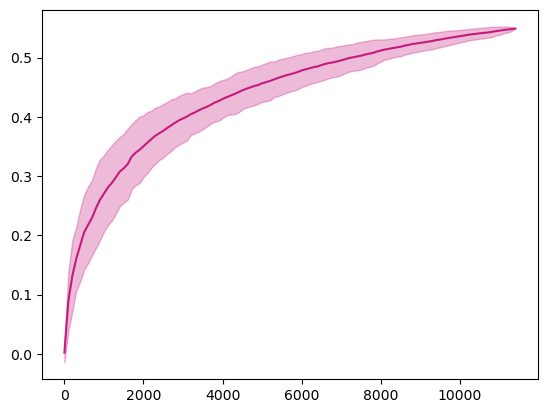

In [6]:
x_kmer = summary["position"]
mean_kmer = summary["mean"]
std_kmer = summary["std"]

plt.plot(x_kmer, mean_kmer, color="#c51b7d", label="Mean cumulative k-mers")
plt.fill_between(x_kmer, mean_kmer-2*std_kmer, mean_kmer+2*std_kmer, alpha=0.3, color="#c51b7d")
